In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Data (same y = 2x + 1)
# -------------------------
x = np.linspace(-1, 1, 200).reshape(-1,1)
y = 2*x + 1
N = len(x)

In [5]:
# -------------------------
# ReLU
# -------------------------
def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return (z > 0).astype(float)

In [6]:
# -------------------------
# Train 1-hidden-layer model
# -------------------------
def train_complex_model(epochs, lr=0.05, hidden_units=10):
    W1 = np.random.randn(1, hidden_units)*0.1
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units,1)*0.1
    b2 = np.zeros((1,1))

    losses = []

    for _ in range(epochs):
        # Forward
        z1 = x @ W1 + b1
        a1 = relu(z1)
        y_pred = a1 @ W2 + b2

        loss = np.mean((y_pred - y)**2)
        losses.append(loss)

        # Backward
        dL_dy = (2/N)*(y_pred - y)
        dW2 = a1.T @ dL_dy
        db2 = np.sum(dL_dy, axis=0, keepdims=True)

        delta = dL_dy @ W2.T * relu_prime(z1)
        dW1 = x.T @ delta
        db1 = np.sum(delta, axis=0, keepdims=True)

        # Update
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

    return losses

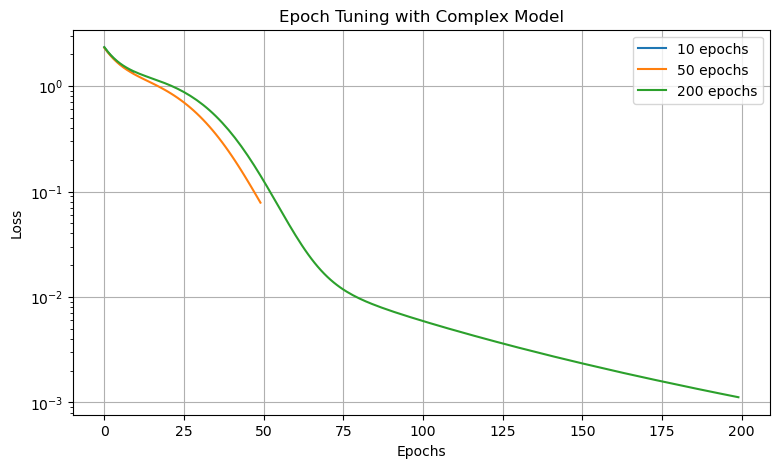

In [7]:
epochs_list = [10, 50, 200]
plt.figure(figsize=(9,5))

for ep in epochs_list:
    losses = train_complex_model(ep)
    plt.plot(losses, label=f"{ep} epochs")

plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch Tuning with Complex Model")
plt.legend()
plt.grid()
plt.show()


🔵 10 Epochs
Loss decreases a little and then stops.
Model has not learned enough.
This is underfitting.
🟠 50 Epochs
Loss decreases more than 10 epochs.
Model learns the pattern reasonably well.
This is a good balance between learning and training time.
🟢 200 Epochs
Loss decreases the most and fastest.
Model fits the data very well.
Extra epochs give small additional improvement.